In [1]:
from ipywidgets import interact
from matplotlib import pyplot as plt
import time
from numpy import random
random.seed(0)

In [2]:
from sequence.kernel.timeline import Timeline
from sequence.topology.node import QuantumRouter, MiddleNode
from sequence.components.optical_channel import QuantumChannel, ClassicalChannel

In [3]:
def test(sim_time, cc_delay, qc_atten, qc_dist):
    """
    sim_time: duration of simulation time (ms)
    cc_delay: delay on classical channels (ns)
    qc_atten: attenuation on quantum channels (db/m)
    qc_dist: distance of quantum channels (km)
    """
    cc_delay *= 1e6
    qc_dist *= 1e3
    raw_fidelity = 0.85
    tl = Timeline(sim_time * 1e9)
    
    r1 = QuantumRouter("r1", tl, 50)
    r2 = QuantumRouter("r2", tl, 100)
    r3 = QuantumRouter("r3", tl, 50)
    m1 = MiddleNode("m1", tl, ["r1", "r2"])
    m2 = MiddleNode("m2", tl, ["r2", "r3"])
    
    for node1 in [r1,r2,r3,m1,m2]:
        for node2 in [r1,r2,r3,m1,m2]:
            cc = ClassicalChannel("cc_%s_%s"%(node1.name, node2.name), tl, 1e3, delay=cc_delay)
            cc.set_ends(node1, node2)

    for node in [r1, r2, r3]:
        node.memory_array.update_memory_params("coherence_time", 10)

    # creat routing table manually
    r1.network_manager.protocol_stack[0].add_forwarding_rule("r2", "r2")
    r1.network_manager.protocol_stack[0].add_forwarding_rule("r3", "r2")
    r2.network_manager.protocol_stack[0].add_forwarding_rule("r1", "r1")
    r2.network_manager.protocol_stack[0].add_forwarding_rule("r3", "r3")
    r3.network_manager.protocol_stack[0].add_forwarding_rule("r1", "r2")
    r3.network_manager.protocol_stack[0].add_forwarding_rule("r2", "r2")

    for node in [r1,r2,r3]:
        node.memory_array.update_memory_params("raw_fidelity", raw_fidelity)
    
    qc1 = QuantumChannel("qc_r1_m1", tl, qc_atten, qc_dist)
    qc1.set_ends(r1, m1)
    qc2 = QuantumChannel("qc_r2_m1", tl, qc_atten, qc_dist)
    qc2.set_ends(r2, m1)
    
    qc3 = QuantumChannel("qc_r2_m2", tl, qc_atten, qc_dist)
    qc3.set_ends(r2, m2)
    qc4 = QuantumChannel("qc_r3_m2", tl, qc_atten, qc_dist)
    qc4.set_ends(r3, m2)
    
    tl.init()
    r1.network_manager.request("r3", 1e12, 1e14, 50, 0.9)

    tick = time.time()
    tl.run()
    print("execution time %.2f sec" % (time.time() - tick))
    
    data = []
    for info in r1.resource_manager.memory_manager:
        if info.entangle_time > 0:
            data.append(info.entangle_time / 1e12)
    data.sort()
    plt.plot(data, range(1, len(data) + 1), marker="o")
    plt.xlabel("Simulation Time (s)")
    plt.ylabel("Aggregated Number of Entangled Memory")
    plt.show()
    print(data)
    
    data = []
    for info in r2.resource_manager.memory_manager:
        if info.entangle_time > 0:
            data.append(info.entangle_time / 1e12)
    data.sort()
    plt.plot(data, range(1, len(data) + 1), marker="o")
    plt.xlabel("Simulation Time (s)")
    plt.ylabel("Aggregated Number of Entangled Memory")
    plt.show()
    print(data)
    
    data = []
    for info in r3.resource_manager.memory_manager:
        if info.entangle_time > 0:
            data.append(info.entangle_time / 1e12)
    data.sort()
    plt.plot(data, range(1, len(data) + 1), marker="o")
    plt.xlabel("Simulation Time (s)")
    plt.ylabel("Aggregated Number of Entangled Memory")
    plt.show()
    print(data)

    data = []
    for info in r1.resource_manager.memory_manager:
        data.append(info.fidelity)
    plt.bar(range(len(data)), data)
    plt.plot([0, len(data)], [raw_fidelity, raw_fidelity], "k--")
    plt.plot([0, len(data)], [0.9, 0.9], "k--")
    plt.ylim(0.7,1)
    plt.show()

    data = []
    for info in r2.resource_manager.memory_manager:
        data.append(info.fidelity)
    plt.bar(range(len(data)), data)
    plt.plot([0, len(data)], [raw_fidelity, raw_fidelity], "k--")
    plt.plot([0, len(data)], [0.9, 0.9], "k--")
    plt.ylim(0.7,1)
    plt.show()

    data = []
    for info in r3.resource_manager.memory_manager:
        data.append(info.fidelity)
    plt.bar(range(len(data)), data)
    plt.plot([0, len(data)], [raw_fidelity, raw_fidelity], "k--")
    plt.plot([0, len(data)], [0.9, 0.9], "k--")
    plt.ylim(0.7,1)
    plt.show()

execution time 73.70 sec


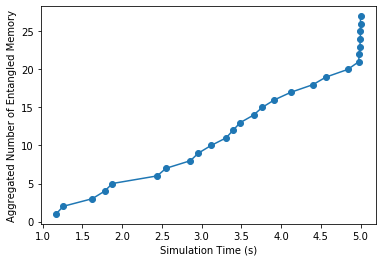

[1.16985043751, 1.25840090001, 1.62435190001, 1.78032723751, 1.87720273751, 2.44105430001, 2.55167956251, 2.85953062501, 2.95908093751, 3.11875617501, 3.30785675001, 3.39530697501, 3.48473221251, 3.65350763751, 3.76120797501, 3.91528357501, 4.12343417501, 4.40003500001, 4.56496056251, 4.83746136251, 4.97528677501, 4.98338685001, 4.99128665001, 4.99743687501, 4.99841182501, 4.99931165001, 4.99946186251]


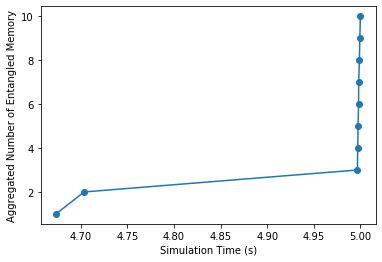

[4.67351073751, 4.70358580001, 4.99671143751, 4.99706167501, 4.99741182501, 4.99796158751, 4.99808653751, 4.99881143751, 4.99931165001, 4.99993647501]


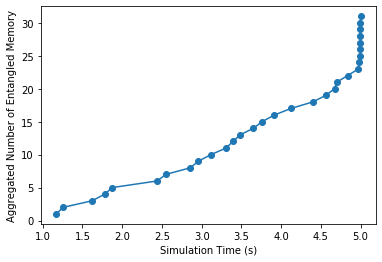

[1.16885043751, 1.25740090001, 1.62335190001, 1.77932723751, 1.87620273751, 2.44005430001, 2.55067956251, 2.85853062501, 2.95808093751, 3.11775617501, 3.30685675001, 3.39430697501, 3.48373221251, 3.65250763751, 3.76020797501, 3.91428357501, 4.12243417501, 4.39903500001, 4.56396056251, 4.67251073751, 4.70258580001, 4.83646136251, 4.97428677501, 4.98238685001, 4.99571143751, 4.99781143751, 4.99808653751, 4.99893647501, 4.99943687501, 4.99946186251, 4.99996158751]


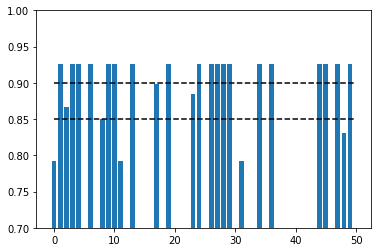

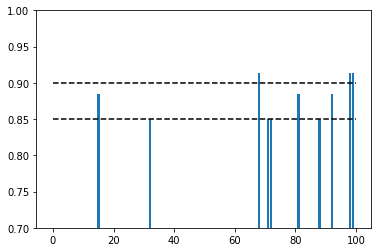

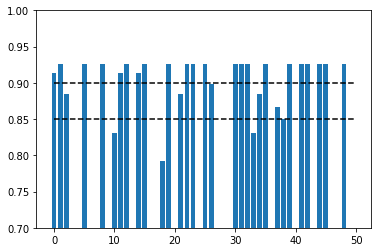

In [4]:
test(5000, 1000, 0.0002, 5)